<a href="https://colab.research.google.com/github/stevenhastings/DS_Workshops/blob/main/DS_Workshop_SuperEnsembleRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***README.md***
# Labs Data Science Workshop: Super Ensemble Regressor

## Workshop Lesson Plan
- [Lesson Plan](lesson_plan.md) - Flow and Timing
- [Lesson Notebook](lesson.ipynb) - Workshop Material

# ***install.sh***

In [ ]:
python -m pip install --upgrade pip
pip install -r requirements.txt

# Gen_Data.py

In [1]:
import os
from string import ascii_uppercase

import numpy as np
import pandas as pd
from sklearn import datasets

n_features = 7
n_samples = 5000
n_outliers = 1000
target = "Target"
features = list(ascii_uppercase)[:n_features]

X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=42,
)
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

df = pd.DataFrame(data=X, columns=features)
df[target] = y
df.head()

df.to_csv(os.path.join("dataset3.csv"), index=False)

# Regressor_Ensembles.ipynb

In [2]:
import os
from time import perf_counter

import pandas as pd
import seaborn as sns
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv("/content/dataset3.csv")
df.head()

,A,B,C,D,E,F,G,Target
0,3.882026,3.882026,3.882026,3.882026,3.882026,3.882026,3.882026,2.559627
1,3.200079,3.200079,3.200079,3.200079,3.200079,3.200079,3.200079,5.924739
2,3.489369,3.489369,3.489369,3.489369,3.489369,3.489369,3.489369,-7.223148
3,4.120447,4.120447,4.120447,4.120447,4.120447,4.120447,4.120447,-1.952860
4,3.933779,3.933779,3.933779,3.933779,3.933779,3.933779,3.933779,-0.719467


In [3]:
df.corr()

,A,B,C,D,E,F,G,Target
A,1.000000,0.632393,0.647090,0.648089,0.651310,0.651741,0.642682,-0.009847
B,0.632393,1.000000,0.632177,0.629128,0.636476,0.655835,0.635223,0.000895
C,0.647090,0.632177,1.000000,0.642568,0.640935,0.650407,0.639885,-0.012229
D,0.648089,0.629128,0.642568,1.000000,0.650064,0.655487,0.642724,-0.005596
E,0.651310,0.636476,0.640935,0.650064,1.000000,0.659519,0.647396,-0.002987
F,0.651741,0.655835,0.650407,0.655487,0.659519,1.000000,0.651744,0.565201
G,0.642682,0.635223,0.639885,0.642724,0.647396,0.651744,1.000000,-0.011547
Target,-0.009847,0.000895,-0.012229,-0.005596,-0.002987,0.565201,-0.011547,1.000000


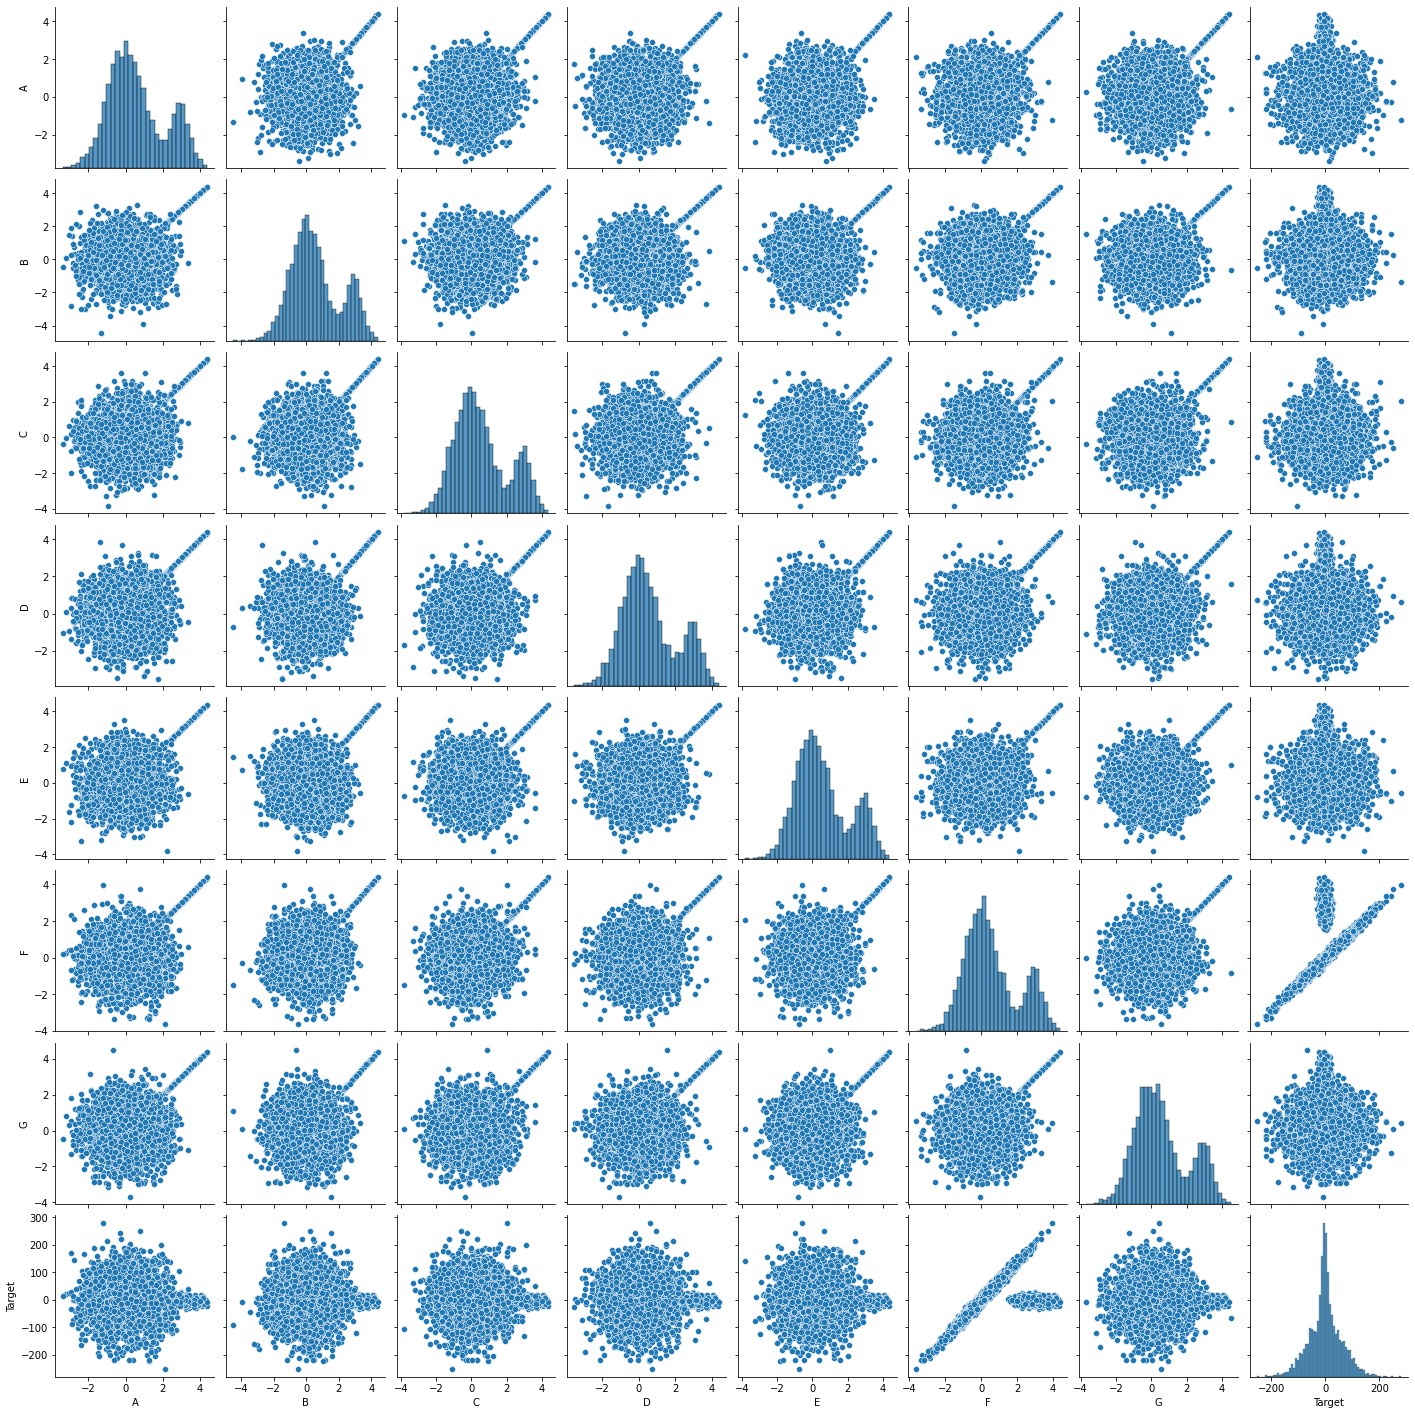

In [4]:
sns.pairplot(df)

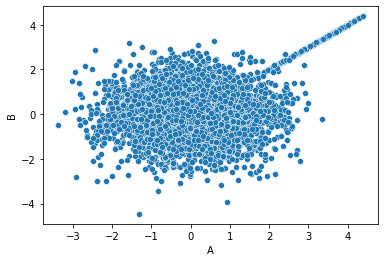

In [5]:
sns.scatterplot(x='A', y='B', data=df)

In [6]:
target = "Target"
features = df.columns.drop(target)

X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df[target],
    random_state=42,
    test_size=0.2,
)

In [7]:
base_model = LinearRegression()
base_model.fit(X_train, y_train)

print(f"MeanSquaredError: {mean_squared_error(y_test, base_model.predict(X_test))}")
print("Accuracy Score: ", base_model.score(X_test, y_test))

MeanSquaredError: 607.5995860880196
Accuracy Score:  0.8265761005387419


In [8]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor

In [9]:
models = [
    RandomForestRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    RidgeCV(),
    BayesianRidge(),
    RidgeCV(),
    LassoCV(),
    SGDRegressor(random_state=42),
    PassiveAggressiveRegressor(random_state=42),
    RANSACRegressor(random_state=42),
]

for model in models:
    model.fit(X_train, y_train)
    print(model)
    print(f"MSE: {mean_squared_error(y_test, model.predict(X_test))}")
    print(f"Model Accuracy Score: {model.score(X_test, y_test)*100:.2f}%")
    print()

RandomForestRegressor(random_state=42)
MSE: 127.06077199788587
Model Accuracy Score: 96.37%

DecisionTreeRegressor(random_state=42)
MSE: 199.63492561554017
Model Accuracy Score: 94.30%

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
MSE: 607.5851931041525
Model Accuracy Score: 82.66%

BayesianRidge()
MSE: 607.5849020065451
Model Accuracy Score: 82.66%

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
MSE: 607.5851931041525
Model Accuracy Score: 82.66%

LassoCV()
MSE: 607.5655731397595
Model Accuracy Score: 82.66%

SGDRegressor(random_state=42)
MSE: 608.876482329797
Model Accuracy Score: 82.62%

PassiveAggressiveRegressor(random_state=42)
MSE: 716.0951273734579
Model Accuracy Score: 79.56%

RANSACRegressor(random_state=42)
MSE: 9210.817214744518
Model Accuracy Score: -162.90%



# Stacking Models that all do, pretty much, the same thing

In [10]:
model = StackingRegressor(
    estimators=[
        ("LR", LinearRegression()),
        ("BRR", BayesianRidge()),
        ("RCV", RidgeCV()),
        ("LCV", LassoCV(random_state=42)),
        ("SGDR", SGDRegressor(random_state=42)),
        ("PAR", PassiveAggressiveRegressor(random_state=42)),
        ("RANSAC", RANSACRegressor(random_state=42)),
    ],
    final_estimator=BayesianRidge(),
)


model.fit(X_train, y_train)
print(model)
print(f"MSE: {mean_squared_error(y_test, model.predict(X_test))}")
print(f"Model Accuracy Score: {model.score(X_test, y_test)*100:.2f}%")

StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('BRR', BayesianRidge()),
                              ('RCV',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('LCV', LassoCV(random_state=42)),
                              ('SGDR', SGDRegressor(random_state=42)),
                              ('PAR',
                               PassiveAggressiveRegressor(random_state=42)),
                              ('RANSAC', RANSACRegressor(random_state=42))],
                  final_estimator=BayesianRidge())
MSE: 606.9990243332002
Model Accuracy Score: 82.67%


# Assessing Ensembles

In [11]:
from sklearn.ensemble import (GradientBoostingRegressor, 
                              HistGradientBoostingRegressor, 
                              ExtraTreesRegressor, 
                              AdaBoostRegressor)

In [12]:
ensembles = [
    ("GBR", GradientBoostingRegressor(random_state=42)),
    ("HGBR", HistGradientBoostingRegressor(random_state=42)),
    ("ET", ExtraTreesRegressor(random_state=42)),
    ("ABR", AdaBoostRegressor(random_state=42)),
    ("RFR", RandomForestRegressor(random_state=42)),
]
for name, ensemble in ensembles:
    start = perf_counter()
    ensemble.fit(X_train, y_train)
    stop = perf_counter()
    duration = stop - start
    print(f"Algorithm: {name}")
    print(f"Train Time: {duration:.2f}s")
    print(f"Test Score: {ensemble.score(X_test, y_test):.2%}")
    print(f"MSE: {mean_squared_error(y_test, ensemble.predict(X_test))}")
    print()

Algorithm: GBR
Train Time: 1.00s
Test Score: 96.32%
MSE: 128.82599651839197

Algorithm: HGBR
Train Time: 0.41s
Test Score: 95.91%
MSE: 143.18707256748965

Algorithm: ET
Train Time: 0.95s
Test Score: 96.47%
MSE: 123.61942598014605

Algorithm: ABR
Train Time: 0.40s
Test Score: 95.54%
MSE: 156.2051009205732

Algorithm: RFR
Train Time: 2.14s
Test Score: 96.37%
MSE: 127.06077199788587



# Stacking Ensembles

In [13]:
model = StackingRegressor(
    estimators=[
        ('LR', LinearRegression()),
        ('RCV', RidgeCV()),
        ('LCV', LassoCV(random_state=42)),
        ('SGDR', SGDRegressor(random_state=42)),
        ('ARDR', ARDRegression()),
        ('PAR', PassiveAggressiveRegressor(random_state=42)),
        ('TSR', TheilSenRegressor(random_state=42)),
        ('RANSAC', RANSACRegressor(random_state=42)),
        ('RFR', RandomForestRegressor(random_state=42)),
        ('HGBR', HistGradientBoostingRegressor(random_state=42)),
        ('ABR', AdaBoostRegressor(random_state=42)),
        ('ET', ExtraTreesRegressor(random_state=42)),
    ],
    final_estimator=StackingRegressor(
        estimators=[
            ('LR', LinearRegression()),
            ('RCV', RidgeCV()),
            ('LCV', LassoCV(random_state=42)),
            ('SGDR', SGDRegressor(random_state=42)),
            ('ARDR', ARDRegression()),
            ('PAR', PassiveAggressiveRegressor(random_state=42)),
            ('TSR', TheilSenRegressor(random_state=42)),
            ('RANSAC', RANSACRegressor(random_state=42)),
            ('RFR', RandomForestRegressor(random_state=42)),
            ('HGBR', HistGradientBoostingRegressor(random_state=42)),
            ('ABR', AdaBoostRegressor(random_state=42)),
            ('ET', ExtraTreesRegressor(random_state=42)),
        ],
        final_estimator=GradientBoostingRegressor(random_state=42),
    ),
)

start = perf_counter()
model.fit(X_train, y_train)
stop = perf_counter()
duration = stop - start

print(f"Workers: {', '.join(model.named_estimators)}")
print(f"Executive: {model.final_estimator}")
print(f"Train Time: {duration:.2f}s")
print(f"Test Score: {model.score(X_test, y_test):.2%}")
print(f"MSE: {mean_squared_error(y_test, model.predict(X_test))}")


Workers: LR, RCV, LCV, SGDR, ARDR, PAR, TSR, RANSAC, RFR, HGBR, ABR, ET
Executive: StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('RCV',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('LCV', LassoCV(random_state=42)),
                              ('SGDR', SGDRegressor(random_state=42)),
                              ('ARDR', ARDRegression()),
                              ('PAR',
                               PassiveAggressiveRegressor(random_state=42)),
                              ('TSR',
                               TheilSenRegressor(max_subpopulation=10000,
                                                 random_state=42)),
                              ('RANSAC', RANSACRegressor(random_state=42)),
                              ('RFR', RandomForestRegressor(random_state=42)),
                              ('HGBR',
                               HistGradientBoostingRegressor(ran

# Above Stack Took Way Too Long So Let's Fix That

In [14]:
model = StackingRegressor(
    estimators=[
        ("GBR", GradientBoostingRegressor(random_state=42)),
        ("HGBR", HistGradientBoostingRegressor(random_state=42)),
        ("ET", ExtraTreesRegressor(random_state=42)),
    ],
    final_estimator=GradientBoostingRegressor(random_state=42),
)

start = perf_counter()
model.fit(X_train, y_train)
stop = perf_counter()
duration = stop - start

print(f"Workers: {', '.join(model.named_estimators)}")
print(f"Executive: {model.final_estimator}")
print(f"Train Time: {duration:.2f}s")
print(f"Test Score: {model.score(X_test, y_test):.2%}")
print(f"MSE: {mean_squared_error(y_test, model.predict(X_test))}")

Workers: GBR, HGBR, ET
Executive: GradientBoostingRegressor(random_state=42)
Train Time: 10.81s
Test Score: 96.80%
MSE: 111.97665607969392
